In [36]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# load nmc_met_io for retrieving micaps server data
import sys
print(sys.path)
sys.path.insert(0, "/home/x711/code/nmc_met_io") # .append("/home/x711/code/nmc_met_io")
print(sys.path)

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

['/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/weather-plot', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']
['/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/weather-plot', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']


## 1 Learn numpy basic

In [38]:
data = np.random.randint(0,10, (2,4))
print(data)

data = np.flip(data, axis=0)

print(data.max())

data = data[np.newaxis, np.newaxis, ...]

print(data)

data = np.array([3,2,4,0,3,2,2,3,1])
table = np.array([5,4,3,2,1])

print(data)

data2 = data.reshape(3,1,3)

print(data2)

data = table[data]
data.max()

a = 195
print(f"{a:b}")
a = 191
print(f"{a:b}")
a = 119
print(f"{a:b}")

data = np.array([4,8,16])
print(data>>2)
print(data.repeat(4))

[[4 4 7 4]
 [7 4 4 5]]
7
[[[[7 4 4 5]
   [4 4 7 4]]]]
[3 2 4 0 3 2 2 3 1]
[[[3 2 4]]

 [[0 3 2]]

 [[2 3 1]]]
11000011
10111111
1110111
[1 2 4]
[ 4  4  4  4  8  8  8  8 16 16 16 16]


## 2 Choose Time

In [39]:
datetime = '20220624110000'

### FY4A L1 002

In [40]:
# 获得风云4A中国区域4通道产品
#directory = "SATELLITE/FY4A/L1/CHINA/C008"
directory = "SATELLITE/FY4A/L1/CHINA/C002/"
filename = f"C002_{datetime}_FY4A.AWX"
data = get_fy_awx(directory,filename, cache=False) #, filename
data

head1_info [(b'EIEN015C.AWX', 0, 40, 2112, 4849, 7001, 1, 4001, 1, 0, b'SAT2004', 0)]
head2_info [(b'FY4-006', 2022, 6, 24, 3, 0, 4, 4, 7001, 4001, 0, 0, 1, 5500, 1500, 7000, 14000, 3500, 10500, 0, 0, 5, 5, 0, 255, 0, 2048, 0, 0)]
calibration_table[0:20] [  0  27  66 104 145 184 223 262 301 340 379 417 458 496 536 575 634 712
 790 868]
calibration_table[-20:] [12000 12000 12000 12000 12000 12000 12000 12000 12000 12000 12000 12000
 12000 12000 12000 12000 12000 12000 12000 12000]
calibration_table[50:150] [[ 6190  6425  6679  6953  7226  7500  7774  8048  8322  8596]
 [ 8890  9202  9516 12000 12000 12000 12000 12000 12000 12000]
 [12000 12000 12000 12000 12000 12000 12000 12000 12000 12000]
 [12000 12000 12000 12000 12000 12000 12000 12000 12000 12000]
 [12000 12000 12000 12000 12000 12000 12000 12000 12000 12000]
 [12000 12000 12000 12000 12000 12000 12000 12000 12000 12000]
 [12000 12000 12000 12000 12000 12000 12000 12000 12000 12000]
 [12000 12000 12000 12000 12000 12000 12000 1200

<xarray.Dataset>
Dimensions:  (time: 1, channel: 1, lat: 4001, lon: 7001)
Coordinates:
  * time     (time) datetime64[ns] 2022-06-24T03:00:00
  * channel  (channel) int16 4
  * lat      (lat) float64 15.0 15.01 15.02 15.03 ... 54.97 54.98 54.99 55.0
  * lon      (lon) float64 70.0 70.01 70.02 70.03 ... 140.0 140.0 140.0 140.0
Data variables:
    image    (time, channel, lat, lon) float64 16.7 16.7 17.87 ... 25.51 25.51
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

<xarray.DataArray 'image' (time: 1, channel: 1, lat: 1000, lon: 1000)>
array([[[[64.25, 64.25, 66.79, ...,  5.36,  5.36,  5.36],
         [64.25, 66.79, 69.53, ...,  5.75,  5.36,  5.36],
         [66.79, 69.53, 69.53, ...,  5.36,  5.36,  5.36],
         ...,
         [ 5.75,  5.75,  6.34, ..., 23.95, 23.95, 22.38],
         [ 7.12,  5.75,  5.75, ..., 23.95, 27.07, 27.07],
         [ 7.12,  7.12,  5.75, ..., 23.95, 22.38, 20.81]]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-06-24T03:00:00
  * channel  (channel) int16 4
  * lat      (lat) float64 30.0 30.01 30.02 30.03 ... 39.96 39.97 39.98 39.99
  * lon      (lon) float64 115.0 115.0 115.0 115.0 ... 125.0 125.0 125.0 125.0
Attributes:
    productCategory:   1
    formatString:      b'SAT2004'
    qualityFlag:       0
    satelliteName:     b'FY4-006'
    flagOfProjection:  4
    units:             
<xarray.DataArray 'image' (lat: 1000, lon: 1000)>
array([[64.25, 64.25, 66.79, ...,  5.36,  5.36,  5.36],
       [64.25, 66.79, 6

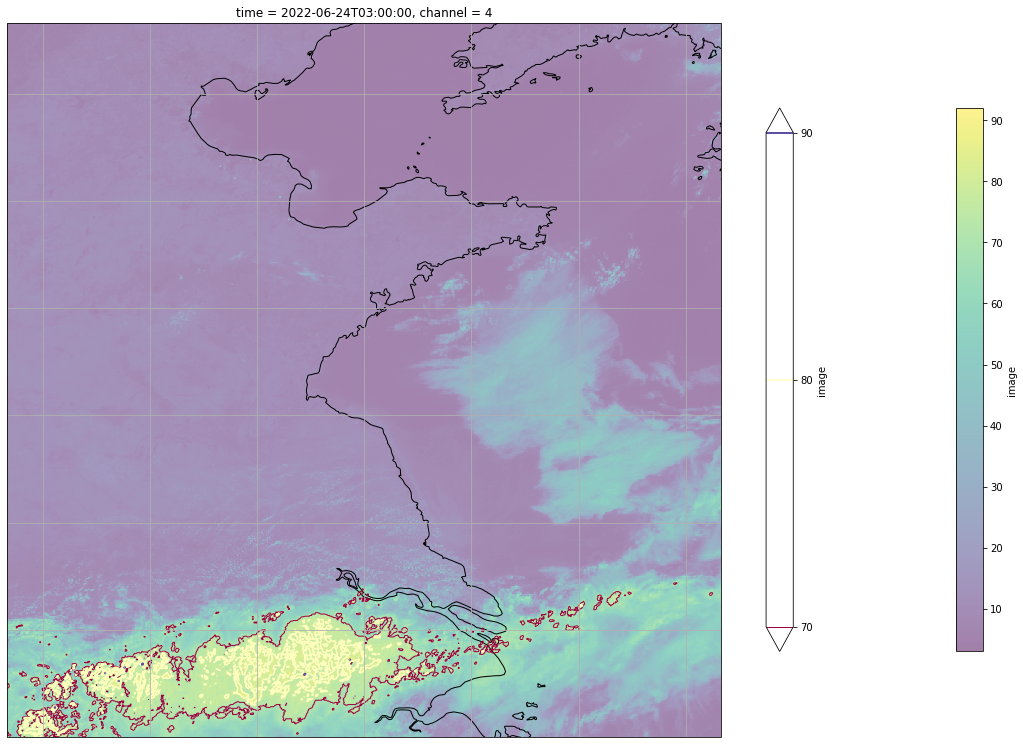

In [41]:
# 绘制图像
""" fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=110))
data_area = data.image.sel(lon=np.linspace(90,120,3000,endpoint=False),lat=np.linspace(25,40,1500,endpoint=False), method="nearest")
print(data_area)
data_area = data_area.isel(time=0, channel=0)
print(data_area)

data_area.plot(ax=ax, transform=ccrs.PlateCarree(), alpha=0.5, cbar_kwargs={'shrink': 0.8})
data_area.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=5) """

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
data_area = data.image.sel(lon=np.linspace(115,125,1000,endpoint=False),lat=np.linspace(30,40,1000,endpoint=False), method="nearest")
print(data_area)
data_area = data_area.isel(time=0, channel=0)
print(data_area)

data_area.plot(ax=ax, alpha=0.5, cbar_kwargs={'shrink': 0.5})
data_area.plot.contour(ax=ax, levels=[70,80,90],linewidths=np.arange(1, 5, 0.5), cmap='Spectral',add_colorbar=True, cbar_kwargs={'shrink': 0.5})

ax.coastlines()
ax.gridlines()
ax.set_extent([115,125,30,40], crs=ccrs.PlateCarree())

In [42]:
datetime = '20220623030000'

### FY4A L1 C012

In [43]:
directory = "SATELLITE/FY4A/L1/CHINA/C012"
filename = f"C012_{datetime}_FY4A.AWX"
data = get_fy_awx2(directory, filename, cache=False) #, filename

data = data - 273.15

data

<xarray.Dataset>
Dimensions:  (time: 1, channel: 1, lat: 1001, lon: 1751)
Coordinates:
  * time     (time) datetime64[ns] 2022-06-22T19:00:00
  * channel  (channel) int16 1
  * lat      (lat) float64 15.0 15.04 15.08 15.12 ... 54.88 54.92 54.96 55.0
  * lon      (lon) float64 70.0 70.04 70.08 70.12 ... 139.9 139.9 140.0 140.0
Data variables:
    image    (time, channel, lat, lon) float64 -12.89 -11.66 ... -1.41 -6.39
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

### FY4A L1 C007

In [44]:
directory = "SATELLITE/FY4A/L1/CHINA/C007"
filename = f"C007_{datetime}_FY4A.AWX"
data07 = get_fy_awx2(directory, filename, cache=False) #, filename

data07 = data07 - 273.15

data07

<xarray.Dataset>
Dimensions:  (time: 1, channel: 1, lat: 2001, lon: 3501)
Coordinates:
  * time     (time) datetime64[ns] 2022-06-22T19:00:00
  * channel  (channel) int16 5
  * lat      (lat) float64 15.0 15.02 15.04 15.06 ... 54.94 54.96 54.98 55.0
  * lon      (lon) float64 70.0 70.02 70.04 70.06 ... 139.9 140.0 140.0 140.0
Data variables:
    image    (time, channel, lat, lon) float64 -6.02 -6.02 -4.65 ... 32.23 32.23
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

<xarray.DataArray 'image' (time: 1, channel: 1, lat: 250, lon: 250)>
array([[[[ 15.89,  15.89,  16.81, ...,  20.36,  20.36,  20.36],
         [ 15.89,  15.89,  16.81, ...,  20.36,  19.92,  20.36],
         [ 15.89,  15.89,  16.35, ...,  20.36,  19.92,  20.36],
         ...,
         [ 10.28,  11.24,  12.64, ..., -30.74, -32.31, -32.31],
         [ 11.24,  10.28,  12.17, ..., -30.74, -30.74, -32.31],
         [ 11.24,  10.28,  12.17, ..., -31.52, -33.1 , -33.1 ]]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-06-22T19:00:00
  * channel  (channel) int16 1
  * lat      (lat) float64 30.0 30.04 30.08 30.12 ... 39.84 39.88 39.92 39.96
  * lon      (lon) float64 115.0 115.0 115.1 115.1 ... 124.8 124.9 124.9 125.0
<xarray.DataArray 'image' (lat: 250, lon: 250)>
array([[ 15.89,  15.89,  16.81, ...,  20.36,  20.36,  20.36],
       [ 15.89,  15.89,  16.81, ...,  20.36,  19.92,  20.36],
       [ 15.89,  15.89,  16.35, ...,  20.36,  19.92,  20.36],
       ...,
       [ 10.28,  11.24,  12.

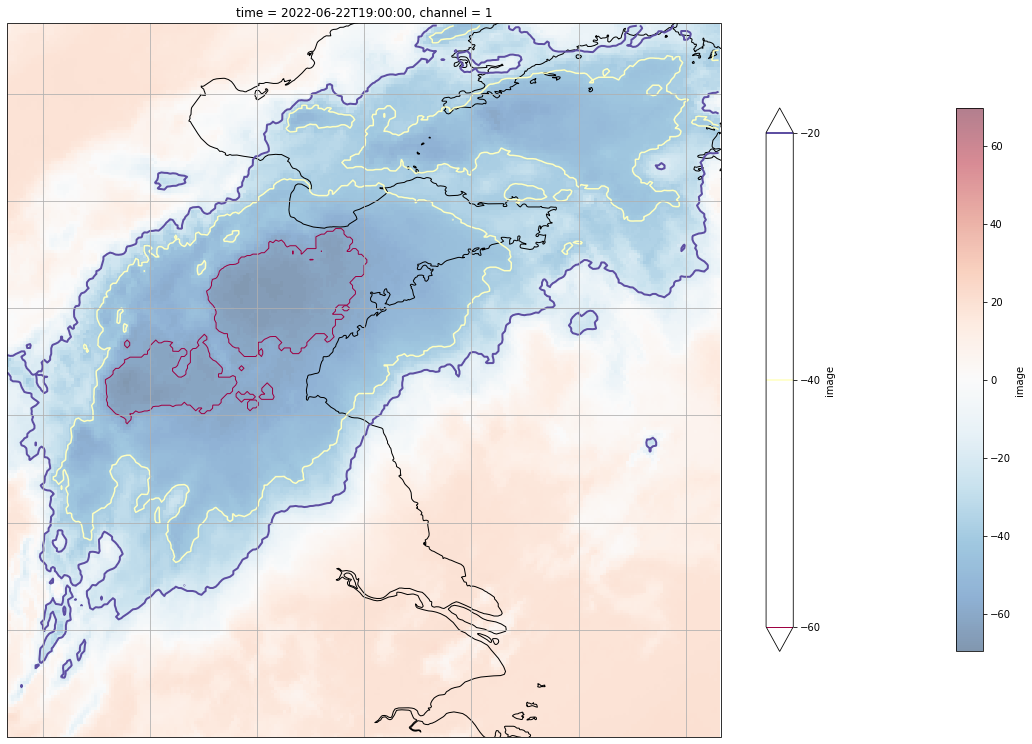

In [45]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
data_area = data.image.sel(lon=np.linspace(115,125,250,endpoint=False),lat=np.linspace(30,40,250,endpoint=False), method="nearest")
print(data_area)
data_area = data_area.isel(time=0, channel=0)
print(data_area)

data_area.plot(ax=ax, alpha=0.5, cbar_kwargs={'shrink': 0.5}) #
data_area.plot.contour(ax=ax, levels=[-60,-40,-20],linewidths=np.arange(1, 5, 0.5), cmap='Spectral',add_colorbar=True, cbar_kwargs={'shrink': 0.5})

ax.coastlines()
ax.gridlines()
ax.set_extent([115,125,30,40], crs=ccrs.PlateCarree())

<xarray.DataArray 'image' (time: 1, channel: 1, lat: 250, lon: 250)>
array([[[[ 20.33,  20.33,  20.33, ...,  19.82,  19.3 ,  19.82],
         [ 19.82,  19.3 ,  19.3 , ...,  19.82,  19.3 ,  19.82],
         [ 18.22,  18.76,  20.33, ...,  18.76,  19.3 ,  19.3 ],
         ...,
         [  7.64,   9.2 ,  12.08, ..., -28.48, -33.01, -39.01],
         [  7.64,   8.42,   9.95, ..., -33.01, -39.01, -33.01],
         [  6.82,   5.97,   8.42, ..., -28.48, -33.01, -28.48]]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-06-22T19:00:00
  * channel  (channel) int16 5
  * lat      (lat) float64 30.0 30.04 30.08 30.12 ... 39.84 39.88 39.92 39.96
  * lon      (lon) float64 115.0 115.0 115.1 115.1 ... 124.8 124.9 124.9 125.0
<xarray.DataArray 'image' (lat: 250, lon: 250)>
array([[ 20.33,  20.33,  20.33, ...,  19.82,  19.3 ,  19.82],
       [ 19.82,  19.3 ,  19.3 , ...,  19.82,  19.3 ,  19.82],
       [ 18.22,  18.76,  20.33, ...,  18.76,  19.3 ,  19.3 ],
       ...,
       [  7.64,   9.2 ,  12.

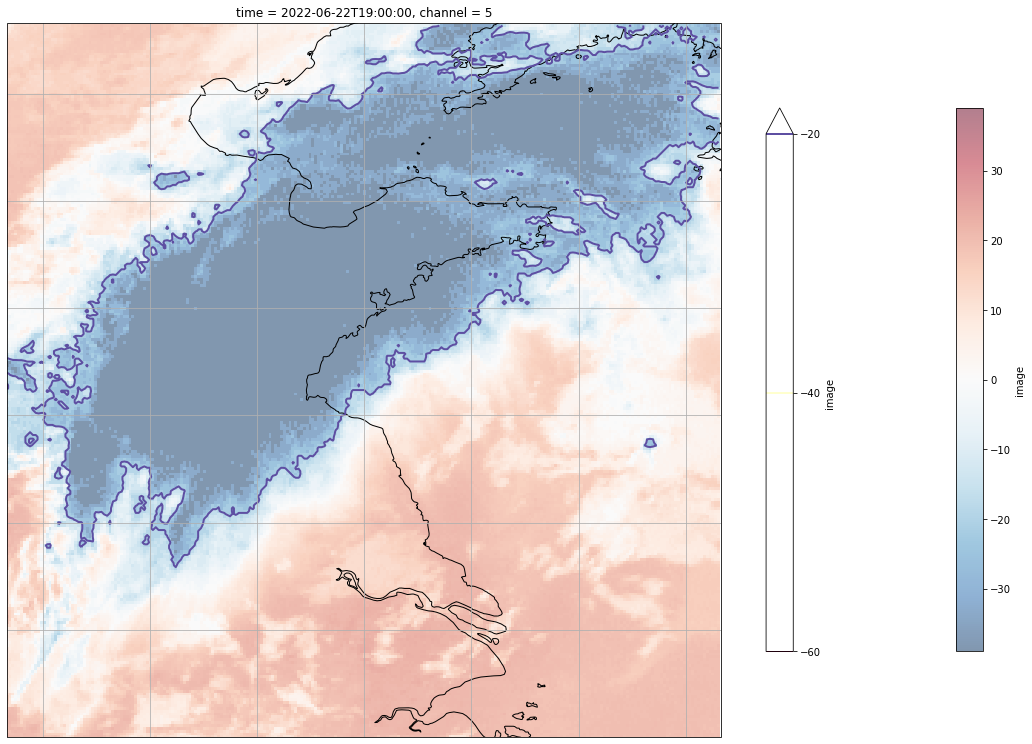

In [46]:


fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
data_area07 = data07.image.sel(lon=np.linspace(115,125,250,endpoint=False),lat=np.linspace(30,40,250,endpoint=False), method="nearest")
print(data_area07)
data_area07 = data_area07.isel(time=0, channel=0)
print(data_area07)

data_area07.plot(ax=ax, alpha=0.5, cbar_kwargs={'shrink': 0.5}) #
data_area07.plot.contour(ax=ax, levels=[-60,-40,-20],linewidths=np.arange(1, 5, 0.5), cmap='Spectral',add_colorbar=True, cbar_kwargs={'shrink': 0.5})

ax.coastlines()
ax.gridlines()
ax.set_extent([115,125,30,40], crs=ccrs.PlateCarree())

### FY4A L1 C007 C012 Diff

<xarray.DataArray 'image' (lat: 250, lon: 250)>
array([[ 4.44,  4.44,  3.52, ..., -0.54, -1.06, -0.54],
       [ 3.93,  3.41,  2.49, ..., -0.54, -0.62, -0.54],
       [ 2.33,  2.87,  3.98, ..., -1.6 , -0.62, -1.06],
       ...,
       [-2.64, -2.04, -0.56, ...,  2.26, -0.7 , -6.7 ],
       [-3.6 , -1.86, -2.22, ..., -2.27, -8.27, -0.7 ],
       [-4.42, -4.31, -3.75, ...,  3.04,  0.09,  4.62]])
Coordinates:
    time     datetime64[ns] 2022-06-22T19:00:00
  * lat      (lat) float64 30.0 30.04 30.08 30.12 ... 39.84 39.88 39.92 39.96
  * lon      (lon) float64 115.0 115.0 115.1 115.1 ... 124.8 124.9 124.9 125.0


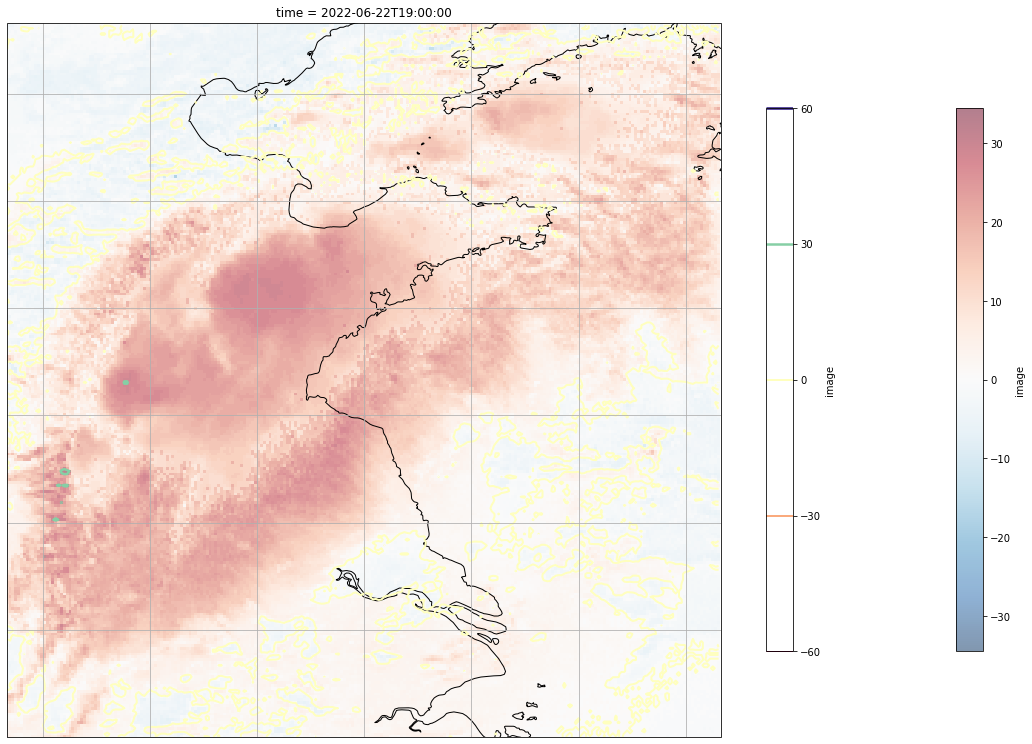

In [47]:
#print(data_area07.drop_vars('channel'))
#print(data_area.drop_vars('channel'))
data_diff = data_area07  - data_area

print(data_diff)

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())


data_diff.plot(ax=ax, alpha=0.5, cbar_kwargs={'shrink': 0.5}) #
data_diff.plot.contour(ax=ax, levels=3,linewidths=np.arange(1, 5, 0.5), cmap='Spectral',add_colorbar=True, cbar_kwargs={'shrink': 0.5})

ax.coastlines()
ax.gridlines()
ax.set_extent([115,125,30,40], crs=ccrs.PlateCarree())

head1_info [(b'EIEU243A.AWX', 0, 40, 2112, 1648, 1900, 3, 1300, 1, 0, b'SAT2004', 0)]
head2_info [(b'FY2G', 2022, 6, 24, 3, 0, 1, 4, 1900, 1300, 0, 0, 1, 5997, -496, 5002, 14497, 2750, 9750, 3000, 6000, 5, 5, 0, 255, 0, 2048, 0, 0)]
calibration_table[0:20] [-31659 -31668 -31676 -31684 -31693 -31701 -31710 -31718 -31726 -31735
 -31743 -31752 -31760 -31769 -31777 -31786 -31794 -31803 -31811 -31820]
calibration_table[-20:] [16252 16110 15957 15794 15623 15435 15230 15004 14758 14473 14141 13747
 13227 12456 10585 10585 10585 10585 10585 10585]
calibration_table[50:150] [[-32084 -32093 -32102 -32110 -32119 -32128 -32136 -32145 -32154 -32162]
 [-32171 -32180 -32188 -32197 -32206 -32214 -32223 -32232 -32240 -32249]
 [-32258 -32266 -32275 -32284 -32293 -32301 -32310 -32319 -32328 -32336]
 [-32345 -32354 -32363 -32371 -32380 -32389 -32398 -32406 -32415 -32424]
 [-32433 -32442 -32450 -32459 -32468 -32477 -32486 -32495 -32503 -32512]
 [-32521 -32530 -32539 -32548 -32556 -32565 -32574 -32583 -325

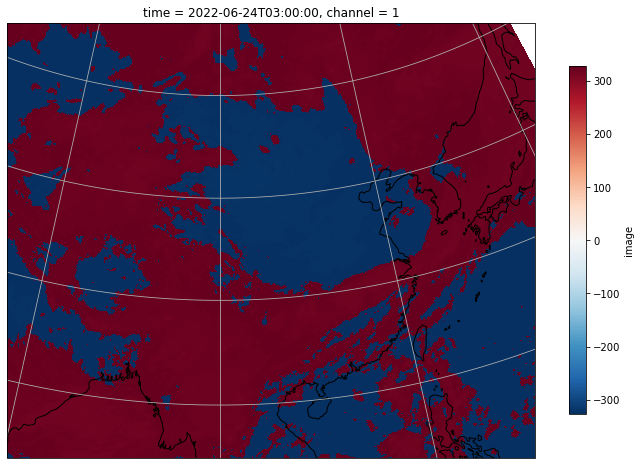

In [48]:
# 风云2静止卫星图像
directory = "SATELLITE/FY2/L1/IR1/EQUAL"
data = get_fy_awx(directory)

# 绘制图像
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=100))
data.image[0,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8})
ax.coastlines()
ax.gridlines()
ax.set_extent([80,130,15,54], crs=ccrs.PlateCarree())

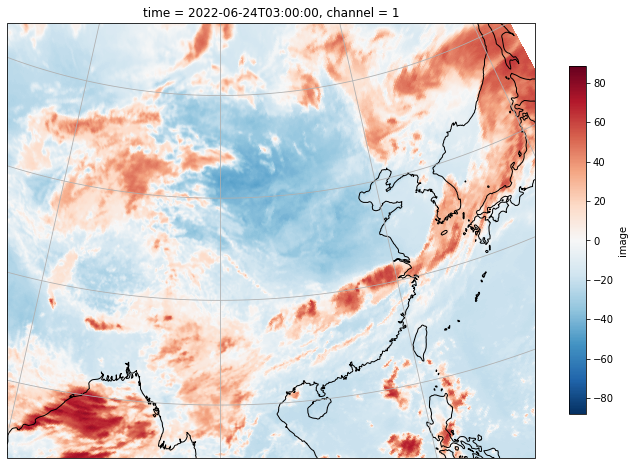

In [49]:
# 风云2静止卫星图像
directory = "SATELLITE/FY2/L1/IR1/EQUAL"
data = get_fy_awx2(directory, cache=False)

data = 273.15-data

# 绘制图像
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=100))
data.image[0,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8})
ax.coastlines()
ax.gridlines()
ax.set_extent([80,130,15,54], crs=ccrs.PlateCarree())